In [1]:
import utils as u

import os
import pickle

import time

import pandas as pd

import matplotlib.pyplot as plt

import mne

In [2]:
import warnings

# Desactivar todos los warnings
warnings.filterwarnings("ignore")

## Paths

In [3]:
# Define the path to the main data folder where the raw eeg can be found
DATA_FOLDER = 'E:\DATA_FOLDER'

# Define the path to the main folder where the microstate data will be stored
MICROSTATES = 'H:\CSIC\MICROSTATES_DATA'
# Create the folder if needed
os.makedirs(MICROSTATES, exist_ok=True)

# Define the path to the main folder where the preprocessed data will be stored
DATA_PREPROCESS = 'H:\CSIC\DATA_PREPROCESSED_MICROSTATES'
# Create the folder if needed
os.makedirs(DATA_PREPROCESS, exist_ok=True)

## Microstates Segmentation

In [12]:
# Open the pickle file
with open(r"H:\CSIC\Microstates\M.pickle", 'rb') as file:
    ModK = pickle.load(file)

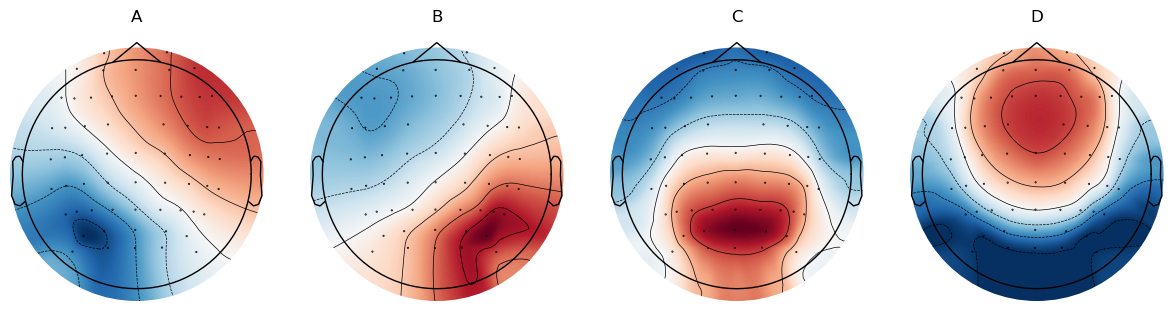

In [13]:
ModK.plot()
plt.show()

In [22]:
# Recording time required for the preprocessing
t = time.time()

# Loop through subject folders
for subject in os.listdir(DATA_FOLDER):
    print('\n', subject)

    # Check if the data has already been preprocessed
    if os.path.exists(os.path.join(MICROSTATES, subject + "_microstate.csv")):
        #print(f"The files for the {subject} patient already exist. Going for the next patient.\n")
        continue

    else:
        # Construct the directory for each patient microstate information
        subject_dir = os.path.join(MICROSTATES, subject)
        
        # Construct the full path to the subject folder
        subject_path = os.path.join(DATA_FOLDER, subject)
    
        # Check if it's a directory
        if os.path.isdir(subject_path):
            print(f"\nProcessing data for subject {subject}...")
            
            # Construct the path to the BrainVision files folder
            rseeg_folder = os.path.join(subject_path, 'RSEEG')
            
            # Check if the RSEEG folder exists
            if os.path.exists(rseeg_folder):

                vhdr_files = [file for file in os.listdir(rseeg_folder) if file.endswith('.vhdr')]
                            
                # Check if a .vhdr file is found
                if vhdr_files:
                    
                    # Construct the full path to the .vhdr file
                    vhdr_path = os.path.join(rseeg_folder, vhdr_files[0])
                    
                    # Read the BrainVision files
                    try:
                        raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
                        raw.set_montage("standard_1020")
                    except Exception as e:
                        print(f"Error reading files for subject {subject}: {e}")

                    # EEG SIGNAL PREPROCESSING
                    # Cleaning EEG: Filtering and removing (ocular) artifacts
                    cleaned_eeg = u.preprocessing(raw)
                    #
                    data = cleaned_eeg._data
                    
                    # Dictionary with data
                    d = u.dictionary(cleaned_eeg)

                    # Samples corresponding to different events between "Closed Eyes" and "Open Eyes"
                    start_samples_ce, start_samples_oe, end_samples_ce, end_samples_oe = u.segment_samples(d)

                    # Join the corresponding pairs and sort them in ascending order
                    pairs = u.pairs(start_samples_ce, start_samples_oe, end_samples_ce, end_samples_oe)

                    # Compute gfp, identify its peaks and valleys
                    _, peaks, valleys = u.gfp_data(cleaned_eeg)


                    # MICROSTATE COMPUTATION AND SEGMENTAION
                    # Compute microstate sequence and store it in a csv
                    u.microstate_segmentation(ModK, cleaned_eeg, peaks, valleys, pairs, subject_dir)
                    
                else:
                    print(f"No .vhdr file found for subject {subject}.")
            else:
                print(f"RSEEG folder not found for subject {subject}.")
        else:
            print(f"There is no subject {subject}.")

pt = time.time() - t
print('Tiempo de preprocesado', pt)


 sub-010002

 sub-010003

 sub-010004

 sub-010005

 sub-010006

 sub-010007

 sub-010010

 sub-010012

 sub-010015

 sub-010016

 sub-010017

 sub-010019

 sub-010020

 sub-010021

 sub-010022

 sub-010023

 sub-010024

 sub-010027

 sub-010028

 sub-010029

 sub-010030

 sub-010031

 sub-010032

 sub-010033

 sub-010034

 sub-010035

 sub-010036

 sub-010037

 sub-010038

 sub-010039

 sub-010040

 sub-010041

 sub-010042

 sub-010044

 sub-010045

 sub-010046

 sub-010047

 sub-010048

 sub-010049

 sub-010050

 sub-010051

 sub-010052

 sub-010053

 sub-010056

 sub-010059

 sub-010060

 sub-010061

 sub-010062

 sub-010063

 sub-010064

 sub-010065

 sub-010066

 sub-010067

 sub-010068

 sub-010069

 sub-010070

 sub-010071

 sub-010072

 sub-010073

 sub-010074

 sub-010075

 sub-010076

 sub-010077

 sub-010078

 sub-010079

 sub-010080

 sub-010081

 sub-010083

 sub-010084

 sub-010085

 sub-010086

 sub-010087

 sub-010088

 sub-010089

 sub-010090

 sub-010091

 sub-010092

## Signal Preprocessing & Reconstruction

In [5]:
# Define the microstate transitions
microstate_transitions = [
    "A-B", "A-C", "A-D", "B-A", "B-C", "B-D",
    "C-A", "C-B", "C-D", "D-A", "D-B", "D-C"
]

# Recording time required for the preprocessing
t = time.time()

# Loop through subject folders
for subject in os.listdir(DATA_FOLDER):
    print(subject)

    # Construct the full path to the subject folder
    subject_path = os.path.join(DATA_FOLDER, subject)
    
    # Check if it's a directory
    if os.path.isdir(subject_path):
        # Construct the path to the BrainVision files folder
        rseeg_folder = os.path.join(subject_path, 'RSEEG')
        
        # Check if the RSEEG folder exists
        if os.path.exists(rseeg_folder):

            vhdr_files = [file for file in os.listdir(rseeg_folder) if file.endswith('.vhdr')]
                            
            # Check if a .vhdr file is found
            if vhdr_files:
                
                # Construct the full path to the .vhdr file
                vhdr_path = os.path.join(rseeg_folder, vhdr_files[0])
                
                # Read the BrainVision files
                try:
                    raw = mne.io.read_raw_brainvision(vhdr_path, eog=('VEOG',), preload=True, misc='auto', scale=1, verbose=None)
                    raw.set_montage("standard_1020")
                except Exception as e:
                    print(f"Error reading files for subject {subject}: {e}")

                # PREPROCESSING
                # Cleaning EEG: Filtering and removing (ocular) artifacts
                cleaned_eeg = u.preprocessing(raw)
                data = cleaned_eeg._data
                
                # Dictionary with data
                #d = u.dictionary(cleaned_eeg)

                # Samples corresponding to different events between "Closed Eyes" and "Open Eyes"
                #start_samples_ce, start_samples_oe, end_samples_ce, end_samples_oe = u.segment_samples(d)

                # Segment division between "Closed Eyes" and "Open Eyes"
                #segments_ce = u.division_segments(data, start_samples_ce, end_samples_ce)
                #segments_oe = u.division_segments(data, start_samples_oe, end_samples_oe)

                # Segment store in a common list and transformation into a DataFrame
                #segments = u.segments_df(cleaned_eeg, segments_ce, segments_oe)

                # Load microstate information
                microstate_file = os.path.join(MICROSTATES, f"{subject}_microstate.csv")
                if not os.path.exists(microstate_file):
                    print(f"No microstate file found for subject {subject}.")
                else:
                    microstates_df = pd.read_csv(microstate_file, delimiter=';')

                    # Create directories for each segment
                    for event_id in range(1, 17):
                        event_folder = os.path.join(DATA_PREPROCESS, f"segment_{event_id}")
                        os.makedirs(event_folder, exist_ok=True)

                        # Filter microstate information for the current event
                        event_microstates = microstates_df[microstates_df["event"] == event_id]

                        # Initialize a dictionary to hold dataframes for each transition
                        transition_dfs = {transition: pd.DataFrame() for transition in microstate_transitions}

                        for idx in range(len(event_microstates) - 1):
                            current_state = event_microstates.iloc[idx]["microstate"]
                            next_state = event_microstates.iloc[idx + 1]["microstate"]
                            transition = f"{current_state}-{next_state}"

                            if transition in microstate_transitions:
                                index = event_microstates.iloc[idx + 1]["index"]
                                start_idx = max(0, index - 13)
                                end_idx = min(data.shape[1], index + 13)
                                segment_data = data[:, start_idx:end_idx]
                                segment_df = pd.DataFrame(segment_data.T)

                                # Format the segment dataframe to be a valid Loreta document
                                formatted_segment_df = u.format_dataframe(segment_df)
                                
                                # Append the segment data to the corresponding transition dataframe
                                transition_dfs[transition] = pd.concat([transition_dfs[transition], segment_df], ignore_index=True)

                        # Save each transition dataframe as a CSV file
                        for transition, df in transition_dfs.items():
                            file_name = f"{subject}_{transition}.csv"
                            file_path = os.path.join(event_folder, file_name)
                            df.to_csv(file_path, index=False, sep='\t', header=False)

pt = time.time() - t
print('Preprocessing time:', pt)

sub-010002
Extracting parameters from E:\DATA_FOLDER\sub-010002\RSEEG\sub-010002.vhdr...
Setting channel info structure...
Reading 0 ... 2554999  =      0.000 ...  1022.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 20.25 Hz)
- Filter length: 25000 samples (10.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Now detecting blinks and generating corresponding events
Found 62 significant peaks
Number of EOG events detected: 62
Not setting metadata
62 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 62 events and 2501 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010003
Extracting parameters from E:\DATA_FOLDER\sub-010003\RSEEG\sub-010003.vhdr...
Setting channel info structure...
Reading 0 ... 2519849  =      0.000 ...  1007.940 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for bli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 374 significant peaks
Number of EOG events detected: 374
Not setting metadata
374 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 374 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 31.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010004
Extracting parameters from E:\DATA_FOLDER\sub-010004\RSEEG\sub-010004.vhdr...
Setting channel info structure...
Reading 0 ... 2555099  =      0.000 ...  1022.040 secs...
EEG channel type selected for re-refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 163
Not setting metadata
163 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 163 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 29.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010005
Extracting parameters from E:\DATA_FOLDER\sub-010005\RSEEG\sub-010005.vhdr...
Setting channel info structure...
Reading 0 ... 2741399  =      0.000 ...  1096.560 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applyi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Now detecting blinks and generating corresponding events
Found 436 significant peaks
Number of EOG events detected: 436
Not setting metadata
436 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 436 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 32.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010006
Extracting parameters from E:\DATA_FOLDER\sub-010006\RSEEG\sub-010006.vhdr...
Setting channel info structure...
Reading 0 ... 2521599  =      0.000 ...

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 43
Not setting metadata
43 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 43 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 32.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010007
Extracting parameters from E:\DATA_FOLDER\sub-010007\RSEEG\sub-010007.vhdr...
Setting channel info structure...
Reading 0 ... 2556699  =      0.000 ...  1022.680 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 117
Not setting metadata
117 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 117 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010010
Extracting parameters from E:\DATA_FOLDER\sub-010010\RSEEG\sub-010010.vhdr...
Setting channel info structure...
Reading 0 ... 2520049  =      0.000 ...  1008.020 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 187
Not setting metadata
187 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 187 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010012
Extracting parameters from E:\DATA_FOLDER\sub-010012\RSEEG\sub-010012.vhdr...
Setting channel info structure...
Reading 0 ... 2614449  =      0.000 ...  1045.780 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 158
Not setting metadata
158 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 158 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010015
Extracting parameters from E:\DATA_FOLDER\sub-010015\RSEEG\sub-010015.vhdr...
Setting channel info structure...
Reading 0 ... 972468  =      0.000 ...   388.987 secs...
EEG channel type selected for re-referencing
Applying average refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Selecting by number: 7 components
Fitting ICA took 9.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010016
Extracting parameters from E:\DATA_FOLDER\sub-010016\RSEEG\sub-010016.vhdr...
Setting channel info structure...
Reading 0 ... 2523649  =      0.000 ...  1009.460 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
----

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 64 significant peaks
Number of EOG events detected: 64
Not setting metadata
64 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 64 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010017
Extracting parameters from E:\DATA_FOLDER\sub-010017\RSEEG\sub-010017.vhdr...
Setting channel info structure...
Reading 0 ... 2525249  =      0.000 ...  1010.100 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 113
Not setting metadata
113 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 113 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010019
Extracting parameters from E:\DATA_FOLDER\sub-010019\RSEEG\sub-010019.vhdr...
Setting channel info structure...
Reading 0 ... 2622249  =      0.000 ...  1048.900 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 120 significant peaks
Number of EOG events detected: 120
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 120 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 26.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010020
Extracting parameters from E:\DATA_FOLDER\sub-010020\RSEEG\sub-010020.vhdr...
Setting channel info structure...
Reading 0 ... 2519199  =      0.000 ...  1007.680 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 8
Not setting metadata
8 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 8 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 5 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010021
Extracting parameters from E:\DATA_FOLDER\sub-010021\RSEEG\sub-010021.vhdr...
Setting channel info structure...
Reading 0 ... 2527649  =      0.000 ...  1011.060 secs...
EEG channel type selected for re-referencing
Applying average reference

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 138
Not setting metadata
138 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 138 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010022
Extracting parameters from E:\DATA_FOLDER\sub-010022\RSEEG\sub-010022.vhdr...
Setting channel info structure...
Reading 0 ... 2505249  =      0.000 ...  1002.100 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 39 significant peaks
Number of EOG events detected: 39
Not setting metadata
39 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 39 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010023
Extracting parameters from E:\DATA_FOLDER\sub-010023\RSEEG\sub-010023.vhdr...
Setting channel info structure...
Reading 0 ... 2510899  =      0.000 ...  1004.360 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 60
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 60 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 37.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010024
Extracting parameters from E:\DATA_FOLDER\sub-010024\RSEEG\sub-010024.vhdr...
Setting channel info structure...
Reading 0 ... 2542599  =      0.000 ...  1017.040 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 160
Not setting metadata
160 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 160 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 16.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010027
Extracting parameters from E:\DATA_FOLDER\sub-010027\RSEEG\sub-010027.vhdr...
Setting channel info structure...
Reading 0 ... 2556349  =      0.000 ...  1022.540 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 80 significant peaks
Number of EOG events detected: 80
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 80 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 15.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010028
Extracting parameters from E:\DATA_FOLDER\sub-010028\RSEEG\sub-010028.vhdr...
Setting channel info structure...
Reading 0 ... 2566749  =      0.000 ...  1026.700 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 94
Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 94 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010029
Extracting parameters from E:\DATA_FOLDER\sub-010029\RSEEG\sub-010029.vhdr...
Setting channel info structure...
Reading 0 ... 2566349  =      0.000 ...  1026.540 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 84 significant peaks
Number of EOG events detected: 84
Not setting metadata
84 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 84 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 5 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010030
Extracting parameters from E:\DATA_FOLDER\sub-010030\RSEEG\sub-010030.vhdr...
Setting channel info structure...
Reading 0 ... 2602249  =      0.000 ...  1040.900 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 143 significant peaks
Number of EOG events detected: 143
Not setting metadata
143 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 143 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010031
Extracting parameters from E:\DATA_FOLDER\sub-010031\RSEEG\sub-010031.vhdr...
Setting channel info structure...
Reading 0 ... 2604849  =      0.000 ...  1041.940 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


240 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 240 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010032
Extracting parameters from E:\DATA_FOLDER\sub-010032\RSEEG\sub-010032.vhdr...
Setting channel info structure...
Reading 0 ... 2503299  =      0.000 ...  1001.320 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 112 significant peaks
Number of EOG events detected: 112
Not setting metadata
112 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 112 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010033
Extracting parameters from E:\DATA_FOLDER\sub-010033\RSEEG\sub-010033.vhdr...
Setting channel info structure...
Reading 0 ... 2523249  =      0.000 ...  1009.300 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


108 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 108 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010034
Extracting parameters from E:\DATA_FOLDER\sub-010034\RSEEG\sub-010034.vhdr...
Setting channel info structure...
Reading 0 ... 2604899  =      0.000 ...  1041.960 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 78
Not setting metadata
78 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 78 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010035
Extracting parameters from E:\DATA_FOLDER\sub-010035\RSEEG\sub-010035.vhdr...
Setting channel info structure...
Reading 0 ... 2556399  =      0.000 ...  1022.560 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 229
Not setting metadata
229 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 229 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010036
Extracting parameters from E:\DATA_FOLDER\sub-010036\RSEEG\sub-010036.vhdr...
Setting channel info structure...
Reading 0 ... 2599949  =      0.000 ...  1039.980 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 162 significant peaks
Number of EOG events detected: 162
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 162 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010037
Extracting parameters from E:\DATA_FOLDER\sub-010037\RSEEG\sub-010037.vhdr...
Setting channel info structure...
Reading 0 ... 2512099  =      0.000 ...  1004.840 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
45 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 45 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010038
Extracting parameters from E:\DATA_FOLDER\sub-010038\RSEEG\sub-010038.vhdr...
Setting channel info structure...
Reading 0 ... 2691799  =      0.000 ...  1076.720 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 140
Not setting metadata
140 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 140 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010039
Extracting parameters from E:\DATA_FOLDER\sub-010039\RSEEG\sub-010039.vhdr...
Setting channel info structure...
Reading 0 ... 2518599  =      0.000 ...  1007.440 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


41 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 41 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010040
Extracting parameters from E:\DATA_FOLDER\sub-010040\RSEEG\sub-010040.vhdr...
Setting channel info structure...
Reading 0 ... 2511899  =      0.000 ...  1004.760 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG cha

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 39
Not setting metadata
39 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 39 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010041
Extracting parameters from E:\DATA_FOLDER\sub-010041\RSEEG\sub-010041.vhdr...
Setting channel info structure...
Reading 0 ... 2537249  =      0.000 ...  1014.900 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 6
Not setting metadata
6 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 6 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010042
Extracting parameters from E:\DATA_FOLDER\sub-010042\RSEEG\sub-010042.vhdr...
Setting channel info structure...
Reading 0 ... 2579999  =      0.000 ...  1032.000 secs...
EEG channel type selected for re-referencing
Applying average reference

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 143
Not setting metadata
143 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 143 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010044
Extracting parameters from E:\DATA_FOLDER\sub-010044\RSEEG\sub-010044.vhdr...
Setting channel info structure...
Reading 0 ... 2586049  =      0.000 ...  1034.420 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 423
Not setting metadata
423 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 423 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010045
Extracting parameters from E:\DATA_FOLDER\sub-010045\RSEEG\sub-010045.vhdr...
Setting channel info structure...
Reading 0 ... 2541749  =      0.000 ...  1016.700 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 94 significant peaks
Number of EOG events detected: 94
Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 94 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 16.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010046
Extracting parameters from E:\DATA_FOLDER\sub-010046\RSEEG\sub-010046.vhdr...
Setting channel info structure...
Reading 0 ... 2519249  =      0.000 ...  1007.700 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 79
Not setting metadata
79 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 79 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010047
Extracting parameters from E:\DATA_FOLDER\sub-010047\RSEEG\sub-010047.vhdr...
Setting channel info structure...
Reading 0 ... 2514499  =      0.000 ...  1005.800 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 31
Not setting metadata
31 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 31 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010048
Extracting parameters from E:\DATA_FOLDER\sub-010048\RSEEG\sub-010048.vhdr...
Setting channel info structure...
Reading 0 ... 2526549  =      0.000 ...  1010.620 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 107
Not setting metadata
107 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 107 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010049
Extracting parameters from E:\DATA_FOLDER\sub-010049\RSEEG\sub-010049.vhdr...
Setting channel info structure...
Reading 0 ... 2536349  =      0.000 ...  1014.540 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 64
Not setting metadata
64 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 64 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010050
Extracting parameters from E:\DATA_FOLDER\sub-010050\RSEEG\sub-010050.vhdr...
Setting channel info structure...
Reading 0 ... 2599899  =      0.000 ...  1039.960 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 246 significant peaks
Number of EOG events detected: 246
Not setting metadata
246 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 246 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 31.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010051
Extracting parameters from E:\DATA_FOLDER\sub-010051\RSEEG\sub-010051.vhdr...
Setting channel info structure...
Reading 0 ... 2543249  =      0.000 ...  1017.300 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 119 significant peaks
Number of EOG events detected: 119
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 119 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 14.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010052
Extracting parameters from E:\DATA_FOLDER\sub-010052\RSEEG\sub-010052.vhdr...
Setting channel info structure...
Reading 0 ... 2806199  =      0.000 ...  1122.480 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 85 significant peaks
Number of EOG events detected: 85
Not setting metadata
85 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 85 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 31.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010053
Extracting parameters from E:\DATA_FOLDER\sub-010053\RSEEG\sub-010053.vhdr...
Setting channel info structure...
Reading 0 ... 2554699  =      0.000 ...  1021.880 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 236
Not setting metadata
236 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 236 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010056
Extracting parameters from E:\DATA_FOLDER\sub-010056\RSEEG\sub-010056.vhdr...
Setting channel info structure...
Reading 0 ... 2608999  =      0.000 ...  1043.600 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 100 significant peaks
Number of EOG events detected: 100
Not setting metadata
100 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 100 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010059
Extracting parameters from E:\DATA_FOLDER\sub-010059\RSEEG\sub-010059.vhdr...
Setting channel info structure...
Reading 0 ... 2773849  =      0.000 ...  1109.540 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 136
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 136 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 32.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010060
Extracting parameters from E:\DATA_FOLDER\sub-010060\RSEEG\sub-010060.vhdr...
Setting channel info structure...
Reading 0 ... 2627049  =      0.000 ...  1050.820 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 154
Not setting metadata
154 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 154 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 39.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010061
Extracting parameters from E:\DATA_FOLDER\sub-010061\RSEEG\sub-010061.vhdr...
Setting channel info structure...
Reading 0 ... 2822549  =      0.000 ...  1129.020 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 97
Not setting metadata
97 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 97 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010062
Extracting parameters from E:\DATA_FOLDER\sub-010062\RSEEG\sub-010062.vhdr...
Setting channel info structure...
Reading 0 ... 2584049  =      0.000 ...  1033.620 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 207
Not setting metadata
207 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 207 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010063
Extracting parameters from E:\DATA_FOLDER\sub-010063\RSEEG\sub-010063.vhdr...
Setting channel info structure...
Reading 0 ... 2680149  =      0.000 ...  1072.060 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
154 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 154 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010064
Extracting parameters from E:\DATA_FOLDER\sub-010064\RSEEG\sub-010064.vhdr...
Setting channel info structure...
Reading 0 ... 2708599  =      0.000 ...  1083.440 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 258 significant peaks
Number of EOG events detected: 258
Not setting metadata
258 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 258 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010065
Extracting parameters from E:\DATA_FOLDER\sub-010065\RSEEG\sub-010065.vhdr...
Setting channel info structure...
Reading 0 ... 2675199  =      0.000 ...  1070.080 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 171
Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 171 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010066
Extracting parameters from E:\DATA_FOLDER\sub-010066\RSEEG\sub-010066.vhdr...
Setting channel info structure...
Reading 0 ... 2570049  =      0.000 ...  1028.020 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 88 significant peaks
Number of EOG events detected: 88
Not setting metadata
88 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 88 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 16.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010067
Extracting parameters from E:\DATA_FOLDER\sub-010067\RSEEG\sub-010067.vhdr...
Setting channel info structure...
Reading 0 ... 2671799  =      0.000 ...  1068.720 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 168
Not setting metadata
168 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 168 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 5 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010068
Extracting parameters from E:\DATA_FOLDER\sub-010068\RSEEG\sub-010068.vhdr...
Setting channel info structure...
Reading 0 ... 2648149  =      0.000 ...  1059.260 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Using data from preloaded Raw for 233 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010069
Extracting parameters from E:\DATA_FOLDER\sub-010069\RSEEG\sub-010069.vhdr...
Setting channel info structure...
Reading 0 ... 2584949  =      0.000 ...  1033.980 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 202
Not setting metadata
202 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 202 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010070
Extracting parameters from E:\DATA_FOLDER\sub-010070\RSEEG\sub-010070.vhdr...
Setting channel info structure...
Reading 0 ... 2676849  =      0.000 ...  1070.740 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 531
Not setting metadata
531 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 531 events and 2501 original time points ...
3 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010071
Extracting parameters from E:\DATA_FOLDER\sub-010071\RSEEG\sub-010071.vhdr...
Setting channel info structure...
Reading 0 ... 2694049  =      0.000 ...  1077.620 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 2
Not setting metadata
2 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 2 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 29.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010072
Extracting parameters from E:\DATA_FOLDER\sub-010072\RSEEG\sub-010072.vhdr...
Setting channel info structure...
Reading 0 ... 2579399  =      0.000 ...  1031.760 secs...
EEG channel type selected for re-referencing
Applying average reference

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 60
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 60 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010073
Extracting parameters from E:\DATA_FOLDER\sub-010073\RSEEG\sub-010073.vhdr...
Setting channel info structure...
Reading 0 ... 2522349  =      0.000 ...  1008.940 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 375
Not setting metadata
375 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 375 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010074
Extracting parameters from E:\DATA_FOLDER\sub-010074\RSEEG\sub-010074.vhdr...
Setting channel info structure...
Reading 0 ... 2688499  =      0.000 ...  1075.400 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 223 significant peaks
Number of EOG events detected: 223
Not setting metadata
223 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 223 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010075
Extracting parameters from E:\DATA_FOLDER\sub-010075\RSEEG\sub-010075.vhdr...
Setting channel info structure...
Reading 0 ... 2682949  =      0.000 ...  1073.180 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 156 significant peaks
Number of EOG events detected: 156
Not setting metadata
156 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 156 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010076
Extracting parameters from E:\DATA_FOLDER\sub-010076\RSEEG\sub-010076.vhdr...
Setting channel info structure...
Reading 0 ... 2600599  =      0.000 ...  1040.240 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 373 significant peaks
Number of EOG events detected: 373
Not setting metadata
373 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 373 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010077
Extracting parameters from E:\DATA_FOLDER\sub-010077\RSEEG\sub-010077.vhdr...
Setting channel info structure...
Reading 0 ... 2601349  =      0.000 ...  1040.540 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 133
Not setting metadata
133 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 133 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010078
Extracting parameters from E:\DATA_FOLDER\sub-010078\RSEEG\sub-010078.vhdr...
Setting channel info structure...
Reading 0 ... 2685599  =      0.000 ...  1074.240 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
185 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 185 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S208', 'Stimulus/S210']
sub-010079
Extracting parameters from E:\DATA_FOLDER\sub-010079\RSEEG\sub-010079.vhdr...
Setting channel info structure...
Reading 0 ... 2554899  =      0.000 ...  1021.960 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 299
Not setting metadata
299 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 299 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010080
Extracting parameters from E:\DATA_FOLDER\sub-010080\RSEEG\sub-010080.vhdr...
Setting channel info structure...
Reading 0 ... 2584949  =      0.000 ...  1033.980 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 82 significant peaks
Number of EOG events detected: 82
Not setting metadata
82 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 82 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010081
Extracting parameters from E:\DATA_FOLDER\sub-010081\RSEEG\sub-010081.vhdr...
Setting channel info structure...
Reading 0 ... 2793599  =      0.000 ...  1117.440 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 324
Not setting metadata
324 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 324 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 27.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010083
Extracting parameters from E:\DATA_FOLDER\sub-010083\RSEEG\sub-010083.vhdr...
Setting channel info structure...
Reading 0 ... 2508499  =      0.000 ...  1003.400 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
86 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 86 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 32.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010084
Extracting parameters from E:\DATA_FOLDER\sub-010084\RSEEG\sub-010084.vhdr...
Setting channel info structure...
Reading 0 ... 2796049  =      0.000 ...  1118.420 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) re

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 120
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 120 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 26.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010085
Extracting parameters from E:\DATA_FOLDER\sub-010085\RSEEG\sub-010085.vhdr...
Setting channel info structure...
Reading 0 ... 2628749  =      0.000 ...  1051.500 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 97
Not setting metadata
97 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 97 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010086
Extracting parameters from E:\DATA_FOLDER\sub-010086\RSEEG\sub-010086.vhdr...
Setting channel info structure...
Reading 0 ... 2543099  =      0.000 ...  1017.240 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 379
Not setting metadata
379 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 379 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010087
Extracting parameters from E:\DATA_FOLDER\sub-010087\RSEEG\sub-010087.vhdr...
Setting channel info structure...
Reading 0 ... 2643699  =      0.000 ...  1057.480 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 203
Not setting metadata
203 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 203 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010088
Extracting parameters from E:\DATA_FOLDER\sub-010088\RSEEG\sub-010088.vhdr...
Setting channel info structure...
Reading 0 ... 2702599  =      0.000 ...  1081.040 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 77 significant peaks
Number of EOG events detected: 77
Not setting metadata
77 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 77 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 29.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010089
Extracting parameters from E:\DATA_FOLDER\sub-010089\RSEEG\sub-010089.vhdr...
Setting channel info structure...
Reading 0 ... 2562899  =      0.000 ...  1025.160 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 36 significant peaks
Number of EOG events detected: 36
Not setting metadata
36 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 36 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010090
Extracting parameters from E:\DATA_FOLDER\sub-010090\RSEEG\sub-010090.vhdr...
Setting channel info structure...
Reading 0 ... 2611649  =      0.000 ...  1044.660 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Applying baseline correction (mode: mean)
Using data from preloaded Raw for 262 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 27.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010091
Extracting parameters from E:\DATA_FOLDER\sub-010091\RSEEG\sub-010091.vhdr...
Setting channel info structure...
Reading 0 ... 2663899  =      0.000 ...  1065.560 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel i

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 55 significant peaks
Number of EOG events detected: 55
Not setting metadata
55 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 55 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010092
Extracting parameters from E:\DATA_FOLDER\sub-010092\RSEEG\sub-010092.vhdr...
Setting channel info structure...
Reading 0 ... 2579999  =      0.000 ...  1032.000 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 171
Not setting metadata
171 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 171 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 32.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010093
Extracting parameters from E:\DATA_FOLDER\sub-010093\RSEEG\sub-010093.vhdr...
Setting channel info structure...
Reading 0 ... 2533749  =      0.000 ...  1013.500 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 226
Not setting metadata
226 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 226 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010094
Extracting parameters from E:\DATA_FOLDER\sub-010094\RSEEG\sub-010094.vhdr...
Setting channel info structure...
Reading 0 ... 2615999  =      0.000 ...  1046.400 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 373
Not setting metadata
373 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 373 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 31.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010100
Extracting parameters from E:\DATA_FOLDER\sub-010100\RSEEG\sub-010100.vhdr...
Setting channel info structure...
Reading 0 ... 2080238  =      0.000 ...   832.095 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 27.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010104
Extracting parameters from E:\DATA_FOLDER\sub-010104\RSEEG\sub-010104.vhdr...
Setting channel info structure...
Reading 0 ... 2601099  =      0.000 ...  1040.440 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 35
Not setting metadata
35 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 35 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010126
Extracting parameters from E:\DATA_FOLDER\sub-010126\RSEEG\sub-010126.vhdr...
Setting channel info structure...
Reading 0 ... 2640099  =      0.000 ...  1056.040 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 232
Not setting metadata
232 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 232 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S208']
sub-010134
Extracting parameters from E:\DATA_FOLDER\sub-010134\RSEEG\sub-010134.vhdr...
Setting channel info structure...
Reading 0 ... 2528399  =      0.000 ...  1011.360 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 149
Not setting metadata
149 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 149 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010136
Extracting parameters from E:\DATA_FOLDER\sub-010136\RSEEG\sub-010136.vhdr...
Setting channel info structure...
Reading 0 ... 2613249  =      0.000 ...  1045.300 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
98 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 98 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010137
Extracting parameters from E:\DATA_FOLDER\sub-010137\RSEEG\sub-010137.vhdr...
Setting channel info structure...
Reading 0 ... 2852849  =      0.000 ...  1141.140 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 176
Not setting metadata
176 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 176 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 38.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010138
Extracting parameters from E:\DATA_FOLDER\sub-010138\RSEEG\sub-010138.vhdr...
Setting channel info structure...
Reading 0 ... 2696349  =      0.000 ...  1078.540 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 479 significant peaks
Number of EOG events detected: 479
Not setting metadata
479 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 479 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010141
Extracting parameters from E:\DATA_FOLDER\sub-010141\RSEEG\sub-010141.vhdr...
Setting channel info structure...
Reading 0 ... 2667999  =      0.000 ...  1067.200 secs...
EEG channel type selected for re-referencing
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 207
Not setting metadata
207 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 207 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010142
Extracting parameters from E:\DATA_FOLDER\sub-010142\RSEEG\sub-010142.vhdr...
Setting channel info structure...
Reading 0 ... 2568599  =      0.000 ...  1027.440 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 86 significant peaks
Number of EOG events detected: 86
Not setting metadata
86 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 86 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010146
Extracting parameters from E:\DATA_FOLDER\sub-010146\RSEEG\sub-010146.vhdr...
Setting channel info structure...
Reading 0 ... 2729749  =      0.000 ...  1091.900 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 17 significant peaks
Number of EOG events detected: 17
Not setting metadata
17 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 17 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010148
Extracting parameters from E:\DATA_FOLDER\sub-010148\RSEEG\sub-010148.vhdr...
Setting channel info structure...
Reading 0 ... 2592899  =      0.000 ...  1037.160 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 206 significant peaks
Number of EOG events detected: 206
Not setting metadata
206 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 206 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 30.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010150
Extracting parameters from E:\DATA_FOLDER\sub-010150\RSEEG\sub-010150.vhdr...
Setting channel info structure...
Reading 0 ... 2620649  =      0.000 ...  1048.260 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 11
Not setting metadata
11 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 11 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 5 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010152
Extracting parameters from E:\DATA_FOLDER\sub-010152\RSEEG\sub-010152.vhdr...
Setting channel info structure...
Reading 0 ... 2693799  =      0.000 ...  1077.520 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 116
Not setting metadata
116 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 116 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 27.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010155
Extracting parameters from E:\DATA_FOLDER\sub-010155\RSEEG\sub-010155.vhdr...
Setting channel info structure...
Reading 0 ... 2710849  =      0.000 ...  1084.340 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 318
Not setting metadata
318 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 318 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 34.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010157
Extracting parameters from E:\DATA_FOLDER\sub-010157\RSEEG\sub-010157.vhdr...
Setting channel info structure...
Reading 0 ... 2648349  =      0.000 ...  1059.340 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 314
Not setting metadata
314 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 314 events and 2501 original time points ...
3 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010162
Extracting parameters from E:\DATA_FOLDER\sub-010162\RSEEG\sub-010162.vhdr...
Setting channel info structure...
Reading 0 ... 2529249  =      0.000 ...  1011.700 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Now detecting blinks and generating corresponding events
Found 189 significant peaks
Number of EOG events detected: 189
Not setting metadata
189 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 189 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010163
Extracting parameters from E:\DATA_FOLDER\sub-010163\RSEEG\sub-010163.vhdr...
Setting channel info structure...
Reading 0 ... 2660999  =      0.000 ...  1064.400 secs..

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 104 significant peaks
Number of EOG events detected: 104
Not setting metadata
104 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 104 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010164
Extracting parameters from E:\DATA_FOLDER\sub-010164\RSEEG\sub-010164.vhdr...
Setting channel info structure...
Reading 0 ... 2623749  =      0.000 ...  1049.500 secs...
EEG channel type selected for re-referencing
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 190
Not setting metadata
190 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 190 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010165
Extracting parameters from E:\DATA_FOLDER\sub-010165\RSEEG\sub-010165.vhdr...
Setting channel info structure...
Reading 0 ... 2565699  =      0.000 ...  1026.280 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 111
Not setting metadata
111 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 111 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010166
Extracting parameters from E:\DATA_FOLDER\sub-010166\RSEEG\sub-010166.vhdr...
Setting channel info structure...
Reading 0 ... 2552799  =      0.000 ...  1021.120 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 106
Not setting metadata
106 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 106 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 26.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010168
Extracting parameters from E:\DATA_FOLDER\sub-010168\RSEEG\sub-010168.vhdr...
Setting channel info structure...
Reading 0 ... 2567799  =      0.000 ...  1027.120 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 128
Not setting metadata
128 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 128 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 38.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010170
Extracting parameters from E:\DATA_FOLDER\sub-010170\RSEEG\sub-010170.vhdr...
Setting channel info structure...
Reading 0 ... 2547549  =      0.000 ...  1019.020 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 51
Not setting metadata
51 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 51 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010176
Extracting parameters from E:\DATA_FOLDER\sub-010176\RSEEG\sub-010176.vhdr...
Setting channel info structure...
Reading 0 ... 2497749  =      0.000 ...   999.100 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 75
Not setting metadata
75 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 75 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 26.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010183
Extracting parameters from E:\DATA_FOLDER\sub-010183\RSEEG\sub-010183.vhdr...
Setting channel info structure...
Reading 0 ... 2546199  =      0.000 ...  1018.480 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 55 significant peaks
Number of EOG events detected: 55
Not setting metadata
55 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 55 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 15.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010191
Extracting parameters from E:\DATA_FOLDER\sub-010191\RSEEG\sub-010191.vhdr...
Setting channel info structure...
Reading 0 ... 2839299  =      0.000 ...  1135.720 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 283
Not setting metadata
283 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 283 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 44.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010192
Extracting parameters from E:\DATA_FOLDER\sub-010192\RSEEG\sub-010192.vhdr...
Setting channel info structure...
Reading 0 ... 2638399  =      0.000 ...  1055.360 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 132
Not setting metadata
132 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 132 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010193
Extracting parameters from E:\DATA_FOLDER\sub-010193\RSEEG\sub-010193.vhdr...
Setting channel info structure...
Reading 0 ... 2641399  =      0.000 ...  1056.560 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 240
Not setting metadata
240 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 240 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010194
Extracting parameters from E:\DATA_FOLDER\sub-010194\RSEEG\sub-010194.vhdr...
Setting channel info structure...
Reading 0 ... 2713749  =      0.000 ...  1085.500 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 206
Not setting metadata
206 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 206 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 30.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010195
Extracting parameters from E:\DATA_FOLDER\sub-010195\RSEEG\sub-010195.vhdr...
Setting channel info structure...
Reading 0 ... 2654649  =      0.000 ...  1061.860 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 95
Not setting metadata
95 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 95 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010196
Extracting parameters from E:\DATA_FOLDER\sub-010196\RSEEG\sub-010196.vhdr...
Setting channel info structure...
Reading 0 ... 2669899  =      0.000 ...  1067.960 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 153
Not setting metadata
153 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 153 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010197
Extracting parameters from E:\DATA_FOLDER\sub-010197\RSEEG\sub-010197.vhdr...
Setting channel info structure...
Reading 0 ... 2506599  =      0.000 ...  1002.640 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 29
Not setting metadata
29 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 29 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010199
Extracting parameters from E:\DATA_FOLDER\sub-010199\RSEEG\sub-010199.vhdr...
Setting channel info structure...
Reading 0 ... 2543849  =      0.000 ...  1017.540 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
245 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 245 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010200
Extracting parameters from E:\DATA_FOLDER\sub-010200\RSEEG\sub-010200.vhdr...
Setting channel info structure...
Reading 0 ... 2749799  =      0.000 ...  1099.920 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) r

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 97
Not setting metadata
97 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 97 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010201
Extracting parameters from E:\DATA_FOLDER\sub-010201\RSEEG\sub-010201.vhdr...
Setting channel info structure...
Reading 0 ... 2619699  =      0.000 ...  1047.880 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 132
Not setting metadata
132 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 132 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010202
Extracting parameters from E:\DATA_FOLDER\sub-010202\RSEEG\sub-010202.vhdr...
Setting channel info structure...
Reading 0 ... 2538099  =      0.000 ...  1015.240 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 120
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 120 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010204
Extracting parameters from E:\DATA_FOLDER\sub-010204\RSEEG\sub-010204.vhdr...
Setting channel info structure...
Reading 0 ... 2735749  =      0.000 ...  1094.300 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 9
Not setting metadata
9 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 9 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010207
Extracting parameters from E:\DATA_FOLDER\sub-010207\RSEEG\sub-010207.vhdr...
Setting channel info structure...
Reading 0 ... 2526199  =      0.000 ...  1010.480 secs...
EEG channel type selected for re-referencing
Applying average reference

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 119
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 119 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010210
Extracting parameters from E:\DATA_FOLDER\sub-010210\RSEEG\sub-010210.vhdr...
Setting channel info structure...
Reading 0 ... 2664299  =      0.000 ...  1065.720 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 92 significant peaks
Number of EOG events detected: 92
Not setting metadata
92 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 92 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010213
Extracting parameters from E:\DATA_FOLDER\sub-010213\RSEEG\sub-010213.vhdr...
Setting channel info structure...
Reading 0 ... 2649849  =      0.000 ...  1059.940 secs...
EEG channel type selected for re-referenci

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 184
Not setting metadata
184 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 184 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 29.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010214
Extracting parameters from E:\DATA_FOLDER\sub-010214\RSEEG\sub-010214.vhdr...
Setting channel info structure...
Reading 0 ... 2663199  =      0.000 ...  1065.280 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 255 significant peaks
Number of EOG events detected: 255
Not setting metadata
255 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 255 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010215
Extracting parameters from E:\DATA_FOLDER\sub-010215\RSEEG\sub-010215.vhdr...
Setting channel info structure...
Reading 0 ... 2713099  =      0.000 ...  1085.240 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 251 significant peaks
Number of EOG events detected: 251
Not setting metadata
251 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 251 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010216
Extracting parameters from E:\DATA_FOLDER\sub-010216\RSEEG\sub-010216.vhdr...
Setting channel info structure...
Reading 0 ... 523979  =      0.000 ...  1047.958 secs...
EEG channel type selected for re-refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Selecting by number: 7 components
Fitting ICA took 5.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010218
Extracting parameters from E:\DATA_FOLDER\sub-010218\RSEEG\sub-010218.vhdr...
Setting channel info structure...
Reading 0 ... 2587349  =      0.000 ...  1034.940 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
----

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 231
Not setting metadata
231 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 231 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010219
Extracting parameters from E:\DATA_FOLDER\sub-010219\RSEEG\sub-010219.vhdr...
Setting channel info structure...
Reading 0 ... 2522149  =      0.000 ...  1008.860 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 148
Not setting metadata
148 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 148 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010220
Extracting parameters from E:\DATA_FOLDER\sub-010220\RSEEG\sub-010220.vhdr...
Setting channel info structure...
Reading 0 ... 2611699  =      0.000 ...  1044.680 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 167
Not setting metadata
167 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 167 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010222
Extracting parameters from E:\DATA_FOLDER\sub-010222\RSEEG\sub-010222.vhdr...
Setting channel info structure...
Reading 0 ... 2553199  =      0.000 ...  1021.280 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 67
Not setting metadata
67 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 67 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010223
Extracting parameters from E:\DATA_FOLDER\sub-010223\RSEEG\sub-010223.vhdr...
Setting channel info structure...
Reading 0 ... 2558549  =      0.000 ...  1023.420 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 276 significant peaks
Number of EOG events detected: 276
Not setting metadata
276 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 276 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010224
Extracting parameters from E:\DATA_FOLDER\sub-010224\RSEEG\sub-010224.vhdr...
Setting channel info structure...
Reading 0 ... 2666249  =      0.000 ...  1066.500 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 280 significant peaks
Number of EOG events detected: 280
Not setting metadata
280 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 280 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010226
Extracting parameters from E:\DATA_FOLDER\sub-010226\RSEEG\sub-010226.vhdr...
Setting channel info structure...
Reading 0 ... 2612749  =      0.000 ...  1045.100 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 342
Not setting metadata
342 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 342 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010227
Extracting parameters from E:\DATA_FOLDER\sub-010227\RSEEG\sub-010227.vhdr...
Setting channel info structure...
Reading 0 ... 2669849  =      0.000 ...  1067.940 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 162
Not setting metadata
162 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 162 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010228
Extracting parameters from E:\DATA_FOLDER\sub-010228\RSEEG\sub-010228.vhdr...
Setting channel info structure...
Reading 0 ... 2670299  =      0.000 ...  1068.120 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 147 significant peaks
Number of EOG events detected: 147
Not setting metadata
147 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 147 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010230
Extracting parameters from E:\DATA_FOLDER\sub-010230\RSEEG\sub-010230.vhdr...
Setting channel info structure...
Reading 0 ... 2777799  =      0.000 ...  1111.120 secs...
EEG channel type selected for re-referencing
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 102 significant peaks
Number of EOG events detected: 102
Not setting metadata
102 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 102 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 27.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010231
Extracting parameters from E:\DATA_FOLDER\sub-010231\RSEEG\sub-010231.vhdr...
Setting channel info structure...
Reading 0 ... 2739649  =      0.000 ...  1095.860 secs...
EEG channel type selected for re-refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 209
Not setting metadata
209 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 209 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010232
Extracting parameters from E:\DATA_FOLDER\sub-010232\RSEEG\sub-010232.vhdr...
Setting channel info structure...
Reading 0 ... 2727949  =      0.000 ...  1091.180 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 155
Not setting metadata
155 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 155 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010233
Extracting parameters from E:\DATA_FOLDER\sub-010233\RSEEG\sub-010233.vhdr...
Setting channel info structure...
Reading 0 ... 2722249  =      0.000 ...  1088.900 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 83 significant peaks
Number of EOG events detected: 83
Not setting metadata
83 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 83 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010234
Extracting parameters from E:\DATA_FOLDER\sub-010234\RSEEG\sub-010234.vhdr...
Setting channel info structure...
Reading 0 ... 2501649  =      0.000 ...  1000.660 secs...
EEG channel type selected for re-referencing
Applying avera

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


117 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 117 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 17.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010236
Extracting parameters from E:\DATA_FOLDER\sub-010236\RSEEG\sub-010236.vhdr...
Setting channel info structure...
Reading 0 ... 2611649  =      0.000 ...  1044.660 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 47
Not setting metadata
47 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 47 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010238
Extracting parameters from E:\DATA_FOLDER\sub-010238\RSEEG\sub-010238.vhdr...
Setting channel info structure...
Reading 0 ... 2722249  =      0.000 ...  1088.900 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 88 significant peaks
Number of EOG events detected: 88
Not setting metadata
88 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 88 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010239
Extracting parameters from E:\DATA_FOLDER\sub-010239\RSEEG\sub-010239.vhdr...
Setting channel info structure...
Reading 0 ... 2624399  =      0.000 ...  1049.760 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 4 significant peaks
Number of EOG events detected: 4
Not setting metadata
4 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 4 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 16.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010240
Extracting parameters from E:\DATA_FOLDER\sub-010240\RSEEG\sub-010240.vhdr...
Setting channel info structure...
Reading 0 ... 2666549  =      0.000 ...  1066.620 secs...
EEG channel type selected for re-referencing
Applying average 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 148
Not setting metadata
148 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 148 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010241
Extracting parameters from E:\DATA_FOLDER\sub-010241\RSEEG\sub-010241.vhdr...
Setting channel info structure...
Reading 0 ... 2550799  =      0.000 ...  1020.320 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 121
Not setting metadata
121 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 121 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 37.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010242
Extracting parameters from E:\DATA_FOLDER\sub-010242\RSEEG\sub-010242.vhdr...
Setting channel info structure...
Reading 0 ... 2669399  =      0.000 ...  1067.760 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 45
Not setting metadata
45 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 45 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010243
Extracting parameters from E:\DATA_FOLDER\sub-010243\RSEEG\sub-010243.vhdr...
Setting channel info structure...
Reading 0 ... 2781249  =      0.000 ...  1112.500 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 67
Not setting metadata
67 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 67 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010244
Extracting parameters from E:\DATA_FOLDER\sub-010244\RSEEG\sub-010244.vhdr...
Setting channel info structure...
Reading 0 ... 2671899  =      0.000 ...  1068.760 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 71 significant peaks
Number of EOG events detected: 71
Not setting metadata
71 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 71 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 30.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010245
Extracting parameters from E:\DATA_FOLDER\sub-010245\RSEEG\sub-010245.vhdr...
Setting channel info structure...
Reading 0 ... 2697999  =      0.000 ...  1079.200 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 55
Not setting metadata
55 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 55 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010246
Extracting parameters from E:\DATA_FOLDER\sub-010246\RSEEG\sub-010246.vhdr...
Setting channel info structure...
Reading 0 ... 2579099  =      0.000 ...  1031.640 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 303
Not setting metadata
303 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 303 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010247
Extracting parameters from E:\DATA_FOLDER\sub-010247\RSEEG\sub-010247.vhdr...
Setting channel info structure...
Reading 0 ... 2715049  =      0.000 ...  1086.020 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 143
Not setting metadata
143 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 143 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010248
Extracting parameters from E:\DATA_FOLDER\sub-010248\RSEEG\sub-010248.vhdr...
Setting channel info structure...
Reading 0 ... 2750049  =      0.000 ...  1100.020 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 164 significant peaks
Number of EOG events detected: 164
Not setting metadata
164 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 164 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 41.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010249
Extracting parameters from E:\DATA_FOLDER\sub-010249\RSEEG\sub-010249.vhdr...
Setting channel info structure...
Reading 0 ... 2590899  =      0.000 ...  1036.360 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 345 significant peaks
Number of EOG events detected: 345
Not setting metadata
345 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 345 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 27.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010250
Extracting parameters from E:\DATA_FOLDER\sub-010250\RSEEG\sub-010250.vhdr...
Setting channel info structure...
Reading 0 ... 2626149  =      0.000 ...  1050.460 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 119
Not setting metadata
119 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 119 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010251
Extracting parameters from E:\DATA_FOLDER\sub-010251\RSEEG\sub-010251.vhdr...
Setting channel info structure...
Reading 0 ... 2586899  =      0.000 ...  1034.760 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 68
Not setting metadata
68 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 68 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010252
Extracting parameters from E:\DATA_FOLDER\sub-010252\RSEEG\sub-010252.vhdr...
Setting channel info structure...
Reading 0 ... 2561949  =      0.000 ...  1024.780 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 112
Not setting metadata
112 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 112 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 31.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010254
Extracting parameters from E:\DATA_FOLDER\sub-010254\RSEEG\sub-010254.vhdr...
Setting channel info structure...
Reading 0 ... 2712799  =      0.000 ...  1085.120 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 152
Not setting metadata
152 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 152 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010255
Extracting parameters from E:\DATA_FOLDER\sub-010255\RSEEG\sub-010255.vhdr...
Setting channel info structure...
Reading 0 ... 2651749  =      0.000 ...  1060.700 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 102
Not setting metadata
102 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 102 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010256
Extracting parameters from E:\DATA_FOLDER\sub-010256\RSEEG\sub-010256.vhdr...
Setting channel info structure...
Reading 0 ... 2873999  =      0.000 ...  1149.600 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 153
Not setting metadata
153 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 153 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010257
Extracting parameters from E:\DATA_FOLDER\sub-010257\RSEEG\sub-010257.vhdr...
Setting channel info structure...
Reading 0 ... 2716349  =      0.000 ...  1086.540 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 198 significant peaks
Number of EOG events detected: 198
Not setting metadata
198 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 198 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010258
Extracting parameters from E:\DATA_FOLDER\sub-010258\RSEEG\sub-010258.vhdr...
Setting channel info structure...
Reading 0 ... 2759549  =      0.000 ...  1103.820 secs...
EEG channel type selected for re-referencing
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 356
Not setting metadata
356 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 356 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 26.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010260
Extracting parameters from E:\DATA_FOLDER\sub-010260\RSEEG\sub-010260.vhdr...
Setting channel info structure...
Reading 0 ... 2584549  =      0.000 ...  1033.820 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 136
Not setting metadata
136 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 136 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010261
Extracting parameters from E:\DATA_FOLDER\sub-010261\RSEEG\sub-010261.vhdr...
Setting channel info structure...
Reading 0 ... 2589549  =      0.000 ...  1035.820 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


34 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 34 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 5 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010262
Extracting parameters from E:\DATA_FOLDER\sub-010262\RSEEG\sub-010262.vhdr...
Setting channel info structure...
Reading 0 ... 2733249  =      0.000 ...  1093.300 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 97
Not setting metadata
97 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 97 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 30.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010263
Extracting parameters from E:\DATA_FOLDER\sub-010263\RSEEG\sub-010263.vhdr...
Setting channel info structure...
Reading 0 ... 2565099  =      0.000 ...  1026.040 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 92 significant peaks
Number of EOG events detected: 92
Not setting metadata
92 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 92 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010264
Extracting parameters from E:\DATA_FOLDER\sub-010264\RSEEG\sub-010264.vhdr...
Setting channel info structure...
Reading 0 ... 2679299  =      0.000 ...  1071.720 secs...
EEG channel type selected for re-referencing
Applying avera

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 60
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 60 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010265
Extracting parameters from E:\DATA_FOLDER\sub-010265\RSEEG\sub-010265.vhdr...
Setting channel info structure...
Reading 0 ... 2556949  =      0.000 ...  1022.780 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 90 significant peaks
Number of EOG events detected: 90
Not setting metadata
90 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 90 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 14.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010266
Extracting parameters from E:\DATA_FOLDER\sub-010266\RSEEG\sub-010266.vhdr...
Setting channel info structure...
Reading 0 ... 2687299  =      0.000 ...  1074.920 secs...
EEG channel type selected for re-referenc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 4 significant peaks
Number of EOG events detected: 4
Not setting metadata
4 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 4 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010267
Extracting parameters from E:\DATA_FOLDER\sub-010267\RSEEG\sub-010267.vhdr...
Setting channel info structure...
Reading 0 ... 3158899  =      0.000 ...  1263.560 secs...
EEG channel type selected for re-referencing
A

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 7 significant peaks
Number of EOG events detected: 7
Not setting metadata
7 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 7 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 46.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010268
Extracting parameters from E:\DATA_FOLDER\sub-010268\RSEEG\sub-010268.vhdr...
Setting channel info structure...
Reading 0 ... 2553099  =      0.000 ...  1021.240 secs...
EEG channel type selected for re-referencing
Applying average 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 145
Not setting metadata
145 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 145 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010269
Extracting parameters from E:\DATA_FOLDER\sub-010269\RSEEG\sub-010269.vhdr...
Setting channel info structure...
Reading 0 ... 2525199  =      0.000 ...  1010.080 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 115 significant peaks
Number of EOG events detected: 115
Not setting metadata
115 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 115 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 14.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010270
Extracting parameters from E:\DATA_FOLDER\sub-010270\RSEEG\sub-010270.vhdr...
Setting channel info structure...
Reading 0 ... 2550899  =      0.000 ...  1020.360 secs...
EEG channel type selected for re-referencing
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 10 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010271
Extracting parameters from E:\DATA_FOLDER\sub-010271\RSEEG\sub-010271.vhdr...
Setting channel info structure...
Reading 0 ... 2756899  =      0.000 ...  1102.760 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EO

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 363 significant peaks
Number of EOG events detected: 363
Not setting metadata
363 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 363 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010272
Extracting parameters from E:\DATA_FOLDER\sub-010272\RSEEG\sub-010272.vhdr...
Setting channel info structure...
Reading 0 ... 2553549  =      0.000 ...  1021.420 secs...
EEG channel type selected for re-referencing
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 248 significant peaks
Number of EOG events detected: 248
Not setting metadata
248 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 248 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010273
Extracting parameters from E:\DATA_FOLDER\sub-010273\RSEEG\sub-010273.vhdr...
Setting channel info structure...
Reading 0 ... 2708049  =      0.000 ...  1083.220 secs...
EEG channel type selected for re-referencing
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 312
Not setting metadata
312 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 312 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 21.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010274
Extracting parameters from E:\DATA_FOLDER\sub-010274\RSEEG\sub-010274.vhdr...
Setting channel info structure...
Reading 0 ... 2577599  =      0.000 ...  1031.040 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 53
Not setting metadata
53 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 53 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010275
Extracting parameters from E:\DATA_FOLDER\sub-010275\RSEEG\sub-010275.vhdr...
Setting channel info structure...
Reading 0 ... 2545599  =      0.000 ...  1018.240 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a cu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 192
Not setting metadata
192 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 192 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010276
Extracting parameters from E:\DATA_FOLDER\sub-010276\RSEEG\sub-010276.vhdr...
Setting channel info structure...
Reading 0 ... 1072839  =      0.000 ...  1072.839 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Selecting by number: 7 components
Fitting ICA took 9.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010277
Extracting parameters from E:\DATA_FOLDER\sub-010277\RSEEG\sub-010277.vhdr...
Setting channel info structure...
Reading 0 ... 1088219  =      0.000 ...  1088.219 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
----

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Selecting by number: 7 components
Fitting ICA took 8.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 5 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010278
Extracting parameters from E:\DATA_FOLDER\sub-010278\RSEEG\sub-010278.vhdr...
Setting channel info structure...
Reading 0 ... 1081739  =      0.000 ...  1081.739 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Selecting by number: 7 components
Fitting ICA took 8.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010279
Extracting parameters from E:\DATA_FOLDER\sub-010279\RSEEG\sub-010279.vhdr...
Setting channel info structure...
Reading 0 ... 1115539  =      0.000 ...  1115.539 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
----

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 10.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010280
Extracting parameters from E:\DATA_FOLDER\sub-010280\RSEEG\sub-010280.vhdr...
Setting channel info structure...
Reading 0 ... 1049539  =      0.000 ...  1049.539 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 10.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010282
Extracting parameters from E:\DATA_FOLDER\sub-010282\RSEEG\sub-010282.vhdr...
Setting channel info structure...
Reading 0 ... 1093579  =      0.000 ...  1093.579 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 10.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010283
Extracting parameters from E:\DATA_FOLDER\sub-010283\RSEEG\sub-010283.vhdr...
Setting channel info structure...
Reading 0 ... 2771099  =      0.000 ...  1108.440 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 85
Not setting metadata
85 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 85 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010284
Extracting parameters from E:\DATA_FOLDER\sub-010284\RSEEG\sub-010284.vhdr...
Setting channel info structure...
Reading 0 ... 2665799  =      0.000 ...  1066.320 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 161
Not setting metadata
161 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 161 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010285
Extracting parameters from E:\DATA_FOLDER\sub-010285\RSEEG\sub-010285.vhdr...
Setting channel info structure...
Reading 0 ... 200249  =      0.000 ...    80.100 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Selecting by number: 7 components
Fitting ICA took 2.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/']
sub-010286
Extracting parameters from E:\DATA_FOLDER\sub-010286\RSEEG\sub-010286.vhdr...
Setting channel info structure...
Reading 0 ... 2911449  =      0.000 ...  1164.580 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using EOG channel: VEOG
EOG channel index for this subject is: [16]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel VEOG for blink detection
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 4
Not setting metadata
4 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 4 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010287
Extracting parameters from E:\DATA_FOLDER\sub-010287\RSEEG\sub-010287.vhdr...
Setting channel info structure...
Reading 0 ... 2554499  =      0.000 ...  1021.800 secs...
EEG channel type selected for re-referencing
Applying average reference

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 260
Not setting metadata
260 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 260 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010288
Extracting parameters from E:\DATA_FOLDER\sub-010288\RSEEG\sub-010288.vhdr...
Setting channel info structure...
Reading 0 ... 2518699  =      0.000 ...  1007.480 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 33
Not setting metadata
33 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 33 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 18.0s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010289
Extracting parameters from E:\DATA_FOLDER\sub-010289\RSEEG\sub-010289.vhdr...
Setting channel info structure...
Reading 0 ... 2888699  =      0.000 ...  1155.480 secs...
EEG channel type selected for re-referencing
Applying average referen

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 102
Not setting metadata
102 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 102 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 28.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010290
Extracting parameters from E:\DATA_FOLDER\sub-010290\RSEEG\sub-010290.vhdr...
Setting channel info structure...
Reading 0 ... 2610649  =      0.000 ...  1044.260 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 157
Not setting metadata
157 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 157 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010291
Extracting parameters from E:\DATA_FOLDER\sub-010291\RSEEG\sub-010291.vhdr...
Setting channel info structure...
Reading 0 ... 2683999  =      0.000 ...  1073.600 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 70
Not setting metadata
70 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 70 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010292
Extracting parameters from E:\DATA_FOLDER\sub-010292\RSEEG\sub-010292.vhdr...
Setting channel info structure...
Reading 0 ... 2644149  =      0.000 ...  1057.660 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 547 significant peaks
Number of EOG events detected: 547
Not setting metadata
547 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 547 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 19.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010294
Extracting parameters from E:\DATA_FOLDER\sub-010294\RSEEG\sub-010294.vhdr...
Setting channel info structure...
Reading 0 ... 2638199  =      0.000 ...  1055.280 secs...
EEG channel type selected for re-refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 125 significant peaks
Number of EOG events detected: 125
Not setting metadata
125 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 125 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.8s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010295
Extracting parameters from E:\DATA_FOLDER\sub-010295\RSEEG\sub-010295.vhdr...
Setting channel info structure...
Reading 0 ... 2658849  =      0.000 ...  1063.540 secs...
EEG channel type selected for re-refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 170 significant peaks
Number of EOG events detected: 170
Not setting metadata
170 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 170 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010296
Extracting parameters from E:\DATA_FOLDER\sub-010296\RSEEG\sub-010296.vhdr...
Setting channel info structure...
Reading 0 ... 2746499  =      0.000 ...  1098.600 secs...
EEG channel type selected for re-refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 55
Not setting metadata
55 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 55 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 27.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010297
Extracting parameters from E:\DATA_FOLDER\sub-010297\RSEEG\sub-010297.vhdr...
Setting channel info structure...
Reading 0 ... 2626949  =      0.000 ...  1050.780 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 31 significant peaks
Number of EOG events detected: 31
Not setting metadata
31 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 31 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/actiCAP Data On', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010298
Extracting parameters from E:\DATA_FOLDER\sub-010298\RSEEG\sub-010298.vhdr...
Setting channel info structure...
Reading 0 ... 2592199  =      0.000 ...  1036.880 secs...
EEG channel type selected for re-referencing
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 169
Not setting metadata
169 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 169 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 14.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010299
Extracting parameters from E:\DATA_FOLDER\sub-010299\RSEEG\sub-010299.vhdr...
Setting channel info structure...
Reading 0 ... 2706599  =      0.000 ...  1082.640 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 172
Not setting metadata
172 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 172 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 34.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010300
Extracting parameters from E:\DATA_FOLDER\sub-010300\RSEEG\sub-010300.vhdr...
Setting channel info structure...
Reading 0 ... 2607499  =      0.000 ...  1043.000 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 128
Not setting metadata
128 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 128 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.5s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010301
Extracting parameters from E:\DATA_FOLDER\sub-010301\RSEEG\sub-010301.vhdr...
Setting channel info structure...
Reading 0 ... 2547299  =      0.000 ...  1018.920 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 37
Not setting metadata
37 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 37 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 22.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010302
Extracting parameters from E:\DATA_FOLDER\sub-010302\RSEEG\sub-010302.vhdr...
Setting channel info structure...
Reading 0 ... 2632949  =      0.000 ...  1053.180 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 105
Not setting metadata
105 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 105 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 34.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010303
Extracting parameters from E:\DATA_FOLDER\sub-010303\RSEEG\sub-010303.vhdr...
Setting channel info structure...
Reading 0 ... 2566599  =      0.000 ...  1026.640 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 297
Not setting metadata
297 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 297 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 16.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010304
Extracting parameters from E:\DATA_FOLDER\sub-010304\RSEEG\sub-010304.vhdr...
Setting channel info structure...
Reading 0 ... 2729499  =      0.000 ...  1091.800 secs...
EEG channel type selected for re-referencing
Applying average ref

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 166 significant peaks
Number of EOG events detected: 166
Not setting metadata
166 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 166 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.2s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010305
Extracting parameters from E:\DATA_FOLDER\sub-010305\RSEEG\sub-010305.vhdr...
Setting channel info structure...
Reading 0 ... 2572499  =      0.000 ...  1029.000 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
178 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 178 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 5 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010306
Extracting parameters from E:\DATA_FOLDER\sub-010306\RSEEG\sub-010306.vhdr...
Setting channel info structure...
Reading 0 ... 2587949  =      0.000 ...  1035.180 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 301
Not setting metadata
301 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 301 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.4s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010307
Extracting parameters from E:\DATA_FOLDER\sub-010307\RSEEG\sub-010307.vhdr...
Setting channel info structure...
Reading 0 ... 2587549  =      0.000 ...  1035.020 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Now detecting blinks and generating corresponding events
Found 94 significant peaks
Number of EOG events detected: 94
Not setting metadata
94 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 94 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 16.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010308
Extracting parameters from E:\DATA_FOLDER\sub-010308\RSEEG\sub-010308.vhdr...
Setting channel info structure...
Reading 0 ... 2683549  =      0.000 ...  10

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
304 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 304 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 25.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010309
Extracting parameters from E:\DATA_FOLDER\sub-010309\RSEEG\sub-010309.vhdr...
Setting channel info structure...
Reading 0 ... 2759099  =      0.000 ...  1103.640 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) r

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 168
Not setting metadata
168 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 168 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 32.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010310
Extracting parameters from E:\DATA_FOLDER\sub-010310\RSEEG\sub-010310.vhdr...
Setting channel info structure...
Reading 0 ... 2720149  =      0.000 ...  1088.060 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 87
Not setting metadata
87 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 87 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 33.9s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010311
Extracting parameters from E:\DATA_FOLDER\sub-010311\RSEEG\sub-010311.vhdr...
Setting channel info structure...
Reading 0 ... 2588399  =      0.000 ...  1035.360 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 159
Not setting metadata
159 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 159 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010314
Extracting parameters from E:\DATA_FOLDER\sub-010314\RSEEG\sub-010314.vhdr...
Setting channel info structure...
Reading 0 ... 2644899  =      0.000 ...  1057.960 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Not setting metadata
112 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 112 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 32.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010315
Extracting parameters from E:\DATA_FOLDER\sub-010315\RSEEG\sub-010315.vhdr...
Setting channel info structure...
Reading 0 ... 2890349  =      0.000 ...  1156.140 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 209
Not setting metadata
209 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 209 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 34.3s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 2 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010316
Extracting parameters from E:\DATA_FOLDER\sub-010316\RSEEG\sub-010316.vhdr...
Setting channel info structure...
Reading 0 ... 2752299  =      0.000 ...  1100.920 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Number of EOG events detected: 145
Not setting metadata
145 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 145 events and 2501 original time points ...
2 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010317
Extracting parameters from E:\DATA_FOLDER\sub-010317\RSEEG\sub-010317.vhdr...
Setting channel info structure...
Reading 0 ... 2693999  =      0.000 ...  1077.600 secs...
EEG channel type selected for re-referencing
Applying average refe

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


Found 137 significant peaks
Number of EOG events detected: 137
Not setting metadata
137 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 137 events and 2501 original time points ...
1 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 24.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010318
Extracting parameters from E:\DATA_FOLDER\sub-010318\RSEEG\sub-010318.vhdr...
Setting channel info structure...
Reading 0 ... 2728149  =      0.000 ...  1091.260 secs...
EEG channel type selected for re-refer

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 35
Not setting metadata
35 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 35 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 23.1s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 1 ICA component
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S200', 'Stimulus/S210']
sub-010319
Extracting parameters from E:\DATA_FOLDER\sub-010319\RSEEG\sub-010319.vhdr...
Setting channel info structure...
Reading 0 ... 2537249  =      0.000 ...  1014.900 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a cu

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 34
Not setting metadata
34 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 34 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 34.6s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 3 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
sub-010321
Extracting parameters from E:\DATA_FOLDER\sub-010321\RSEEG\sub-010321.vhdr...
Setting channel info structure...
Reading 0 ... 2597649  =      0.000 ...  1039.060 secs...
EEG channel type selected for re-referencing
Applying average refere

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Number of EOG events detected: 65
Not setting metadata
65 matching events found
Applying baseline correction (mode: mean)
Using data from preloaded Raw for 65 events and 2501 original time points ...
0 bad epochs dropped
Fitting ICA to data using 61 channels (please be patient, this may take a while)
Selecting by number: 7 components
Fitting ICA took 20.7s.
Using EOG channel: VEOG
Applying ICA to Raw instance
    Transforming to ICA space (7 components)
    Zeroing out 4 ICA components
    Projecting back using 61 PCA components
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Used Annotations descriptions: ['Comment/no USB Connection to actiCAP', 'New Segment/', 'Stimulus/S  1', 'Stimulus/S200', 'Stimulus/S210']
Preprocessing time: 33677.69486832619


## Obtaining required files

In [4]:
source_path = r'H:\CSIC\DATA_PREPROCESSED_MICROSTATES'
target_path = r'C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T2'
for segment_number in range(16, 17):
    u.process_microstates_data(source_path, target_path, segment_number)

Directory C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T2 already exists.
Data saved to C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T2\segment_16.csv


In [5]:
# Define the base path and output path
base_path = r'C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T2\Segments'
output_path = r'C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T2'

# Check if the output directory exists, if not, create it
if not os.path.exists(output_path):
    os.makedirs(output_path)
    print(f"Directory {output_path} created.")
else:
    print(f"Directory {output_path} already exists.")

# Process the segments
u.process_segments(base_path, output_path)

Directory C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T2 already exists.
Closed eyes segments combined and saved.
Open eyes segments combined and saved.


## Pre-visualization of required files

In [23]:
df_ce = pd.read_csv(r'C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T1\segments_ce.csv')
df_oe = pd.read_csv(r'C:\Users\enriq\Anaconda\CSIC\DATA_PREPROCESSED_ROIS\T1\segments_ce.csv')

In [24]:
df_ce

,PatientID,MicrostateTransition,MicrostateFrom,MicrostateTo,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,...,ROI_201,ROI_202,ROI_203,ROI_204,ROI_205,ROI_206,ROI_207,ROI_208,ROI_209,ROI_210
0,sub-010002,A-B,A,B,-0.776863,-1.047888,-1.029067,-0.287142,-0.416138,-1.717155,...,-1.143134,-0.883061,-1.091942,-1.317218,-0.931245,-0.375221,-0.737228,-0.477768,-0.776425,-0.928244
1,sub-010002,A-C,A,C,-0.771269,-1.098570,-1.027008,-0.154782,-0.305591,-1.814238,...,-1.098937,-0.861852,-0.929689,-1.257250,-0.860854,-0.358898,-0.622232,-0.307329,-0.723719,-0.990508
2,sub-010002,A-D,A,D,-0.932837,-0.961840,-0.748885,-0.424583,-0.474838,-1.549932,...,-1.035396,-0.818267,-0.904294,-1.192615,-0.834611,-0.225928,-0.561964,-0.347568,-0.756053,-0.916434
3,sub-010002,B-A,B,A,-0.892470,-1.097515,-0.951423,-0.281124,-0.379696,-1.715338,...,-1.231496,-0.929242,-1.098736,-1.407878,-0.954272,-0.421197,-0.749246,-0.452751,-0.893842,-1.032031
4,sub-010002,B-C,B,C,-0.849049,-1.114318,-1.060720,-0.161864,-0.259459,-1.797358,...,-1.072716,-0.738756,-0.914714,-1.243107,-0.852950,-0.356048,-0.528338,-0.338588,-0.741631,-0.919800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17947,sub-010321,C-B,C,B,-1.120064,-1.432960,-1.249691,-0.413685,-0.469663,-1.772092,...,-0.135510,0.443204,-0.125005,-0.234097,0.471745,0.277671,0.651164,0.488643,-0.021723,-0.376041
17948,sub-010321,C-D,C,D,-1.310042,-1.477558,-1.513108,-0.812286,-0.756704,-1.973657,...,-0.119519,0.581003,-0.109308,-0.198469,0.643285,0.268041,0.887021,0.542153,-0.091849,-0.509950
17949,sub-010321,D-A,D,A,-0.953306,-1.345225,-1.377445,-0.237667,-0.254575,-1.955627,...,-0.112651,0.451916,-0.153214,-0.225725,0.475580,0.095784,0.683465,0.427743,-0.164580,-0.493567
17950,sub-010321,D-B,D,B,-1.259065,-1.534185,-1.497008,-0.721964,-0.675112,-1.993461,...,-0.029847,0.657305,0.068945,-0.086916,0.930402,0.469534,1.061763,0.842504,-0.025791,-0.308462


In [20]:
df_oe

,Unnamed: 0,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,...,ROI_201,ROI_202,ROI_203,ROI_204,ROI_205,ROI_206,ROI_207,ROI_208,ROI_209,ROI_210
0,sub-010002_A-B,-0.776863,-1.047888,-1.029067,-0.287142,-0.416138,-1.717155,-0.765307,-0.958949,-1.110857,...,-1.143134,-0.883061,-1.091942,-1.317218,-0.931245,-0.375221,-0.737228,-0.477768,-0.776425,-0.928244
1,sub-010002_A-C,-0.771269,-1.098570,-1.027008,-0.154782,-0.305591,-1.814238,-0.645250,-0.809966,-0.960739,...,-1.098937,-0.861852,-0.929689,-1.257250,-0.860854,-0.358898,-0.622232,-0.307329,-0.723719,-0.990508
2,sub-010002_A-D,-0.932837,-0.961840,-0.748885,-0.424583,-0.474838,-1.549932,-0.682606,-0.549625,-0.987779,...,-1.035396,-0.818267,-0.904294,-1.192615,-0.834611,-0.225928,-0.561964,-0.347568,-0.756053,-0.916434
3,sub-010002_B-A,-0.892470,-1.097515,-0.951423,-0.281124,-0.379696,-1.715338,-0.668112,-0.871768,-1.162431,...,-1.231496,-0.929242,-1.098736,-1.407878,-0.954272,-0.421197,-0.749246,-0.452751,-0.893842,-1.032031
4,sub-010002_B-C,-0.849049,-1.114318,-1.060720,-0.161864,-0.259459,-1.797358,-0.761419,-0.929237,-1.177403,...,-1.072716,-0.738756,-0.914714,-1.243107,-0.852950,-0.356048,-0.528338,-0.338588,-0.741631,-0.919800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,sub-010321_C-B,-1.297426,-1.462045,-1.229492,-0.835322,-0.809271,-1.912000,-0.888782,-1.064344,-2.590731,...,0.140667,0.857061,0.123764,-0.017831,0.977702,0.543433,1.116677,0.813098,0.286611,-0.202289
2240,sub-010321_C-D,-1.344808,-1.570192,-1.301385,-0.716153,-0.719939,-1.982433,-0.967942,-1.068777,-2.545360,...,0.246547,0.989366,0.050988,-0.014864,0.864271,0.367971,1.142457,0.783785,0.253219,-0.258760
2241,sub-010321_D-A,-1.455638,-1.528067,-1.307011,-0.826757,-0.852179,-2.033460,-0.981791,-1.095460,-2.466862,...,0.208960,0.971107,0.203760,0.087691,1.046284,0.576259,1.301856,1.037061,0.146139,-0.321258
2242,sub-010321_D-B,-1.787041,-1.770766,-1.389126,-1.076111,-1.061971,-2.065405,-1.097787,-1.302997,-2.581401,...,0.211154,0.968843,0.142705,0.005565,0.906247,0.385535,1.129696,0.789928,0.303189,-0.288187
